## Value the gap

In [1]:
import os
import sys
import matplotlib.pyplot as plt

import numpy as np
from joblib import Parallel, delayed
sys.path.insert(0, os.path.abspath('..'))
from sustained_ihp import SustainedIHP
from dcc import OAV, AAV, Parameters
from chp import CHP
PATH_TO_PICKLE = '/Users/mmark/Documents/credit_collections/credit_collections_rl/dcc/ref_parameters'
params = Parameters()
oc = OAV.load(PATH_TO_PICKLE)
av = AAV(params)
fig = oc.plot_statespace()


[INFO] [2020-04-02 08:24:36,193] [AAV] - Instantiated @ AAV


In [4]:
lambda_hat = 0.11
starting_balance = 100
sihp = SustainedIHP(starting_balance, params)
sihp.logger.disabled = True

#approx_lstars = sihp.calculate_frontier()

# mc = Parallel(n_jobs=10)(delayed(sihp.calculate_frontier)() for i in range(100))
mc = np.load('mc_100_samples.npy')

[INFO] [2020-04-02 08:22:26,636] [SustainedIHP] - Instantiated sustain process @ SustainedIHP


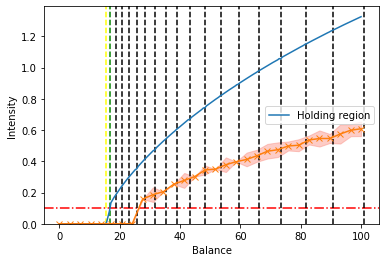

In [3]:
fig, ax = plt.subplots()
ax.axhline(y=oc.p.lambdainf, linestyle='-.', color='red')
ax.axvline(x=oc.w_, linestyle='--', color='yellow')
ax.axvline(x=oc.w0star, linestyle='--', color='green')
for wstar in oc.wistar[2:]:
    ax.axvline(x=wstar, linestyle='--', color='black')

h1 = ax.plot(oc.w_vector, oc.lambdastars)
ax.set_ylim(bottom=0)
ax.set_xlabel('Balance')
ax.set_ylabel('Intensity')
ax.legend([h1[0]], ['Holding region'])
lstar_greedy = np.mean(np.array(mc), 0)
lstar_greedy_std = np.std(np.array(mc), 0)
ax.plot(sihp.ws, lstar_greedy, marker='x')
ax.fill_between(sihp.ws,lstar_greedy-2*lstar_greedy_std, lstar_greedy+2*lstar_greedy_std, alpha=0.4, color='salmon')

In [4]:
from chp import CHP

def optimal_frontier(w):
    index = np.digitize(w, oc.w_vector)
    return oc.lambdastars[index]

def greedy_policy(w):
    index = np.digitize(w, sihp.ws)
    return lstar_greedy[index]

params = Parameters()
chp_optimal = CHP(params, control = optimal_frontier)
chp_greedy = CHP(params, control = greedy_policy)
chp_aut = CHP(params)

[INFO] [2020-04-02 08:16:37,839] [CHP] - Instantiated @ CHP
[INFO] [2020-04-02 08:16:37,840] [CHP] - Instantiated @ CHP
[INFO] [2020-04-02 08:16:37,841] [CHP] - Instantiated @ CHP


In [5]:
chp_optimal.v(1, 75)

-62.44440132618767

In [6]:
w_grid = np.linspace(0, 75, 10)
v_opt = np.zeros_like(w_grid)
v_approx = np.zeros_like(w_grid)
v_greedy = np.zeros_like(w_grid)
u = np.zeros_like(w_grid)
lstart = 1
for i, w in enumerate(w_grid):
    v_opt[i] = oc.v(lstart, w)
    u[i] = av.u(lstart, w)
    v_approx[i] = chp_optimal.v(lstart, w)
    v_greedy[i] = chp_greedy.v(lstart, w)

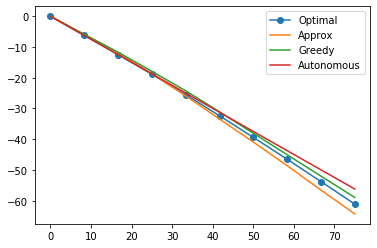

In [7]:
plt.plot(w_grid, v_opt, marker='o')
plt.plot(w_grid, v_approx)
plt.plot(w_grid, v_greedy)
plt.plot(w_grid, u)
plt.legend(['Optimal', 'Approx', 'Greedy', 'Autonomous'])

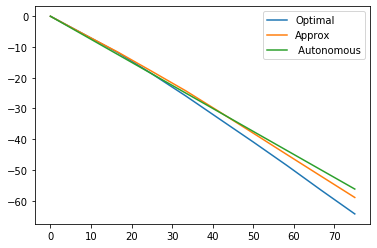

In [15]:
# plt.plot(w_grid, v_opt, marker='o')
plt.plot(w_grid, v_approx)
plt.plot(w_grid, v_greedy)
plt.plot(w_grid, u)
plt.legend(['Optimal', 'Approx', ' Autonomous'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


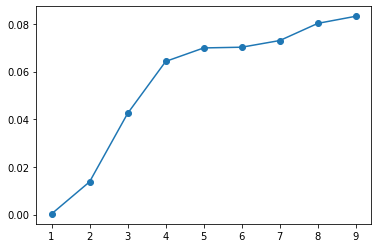

In [13]:
plt.plot((v_approx - v_greedy)/v_approx, marker='o')

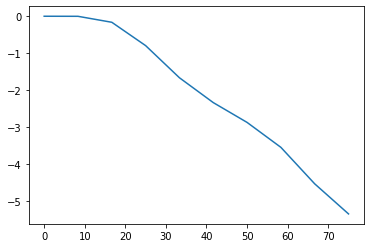

In [12]:
plt.plot(w_grid, v_approx - v_greedy)

In [2]:
starting_balance = 500
sihp = SustainedIHP(starting_balance, params, lmax_profile=3, ws_points=100, niter=1e6)
sihp.logger.disabled = True

# mc = Parallel(n_jobs=10)(delayed(sihp.calculate_frontier)() for i in range(100))
# np.save('mc_100_samples_500usd.npy', mc)

mc500 = np.load('mc_100_samples_500usd.npy')

[INFO] [2020-04-02 08:24:43,890] [SustainedIHP] - Instantiated sustain process @ SustainedIHP


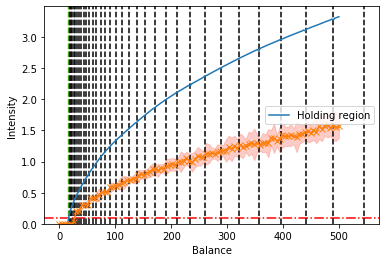

In [26]:
PATH_TO_PICKLE_500 = '/Users/mmark/Documents/credit_collections/credit_collections_rl/dcc/precomputed_w500'
params = Parameters()
oc500 = OAV.load(PATH_TO_PICKLE_500)
fig, ax = plt.subplots()
ax.axhline(y=oc500.p.lambdainf, linestyle='-.', color='red')
ax.axvline(x=oc500.w_, linestyle='--', color='yellow')
ax.axvline(x=oc500.w0star, linestyle='--', color='green')
for wstar in oc500.wistar[2:]:
    ax.axvline(x=wstar, linestyle='--', color='black')

h1 = ax.plot(oc500.w_vector, oc500.lambdastars)
ax.set_ylim(bottom=0)
ax.set_xlabel('Balance')
ax.set_ylabel('Intensity')
ax.legend([h1[0]], ['Holding region'])
lstar_greedy = np.mean(np.array(mc500), 0)
lstar_greedy_std = np.std(np.array(mc500), 0)
ax.plot(sihp.ws, lstar_greedy, marker='x')
ax.fill_between(sihp.ws,lstar_greedy-2*lstar_greedy_std, lstar_greedy+2*lstar_greedy_std, alpha=0.4, color='salmon')

In [61]:
def optimal_frontier(w):
    index = np.digitize(w, oc500.w_vector)
    return oc500.lambdastars[index]

def greedy_policy(w):
    index = np.digitize(w, sihp.ws)
    return lstar_greedy[index]

params = Parameters()
chp_optimal = CHP(params, control = optimal_frontier)
chp_greedy = CHP(params, control = greedy_policy)
chp_aut = CHP(params)

w_grid = np.linspace(0, 499, 20)
v_opt = np.zeros_like(w_grid)
v_approx = np.zeros_like(w_grid)
v_greedy = np.zeros_like(w_grid)
v_aut = np.zeros_like(w_grid)
u = np.zeros_like(w_grid)
lstart = 0.5
for i, w in enumerate(w_grid):
    v_opt[i] = oc500.v(lstart, w)
    u[i] = av.u(lstart, w)
    v_approx[i] = chp_optimal.v(lstart, w,)
    v_greedy[i] = chp_greedy.v(lstart, w)
    v_aut[i] = chp_aut.v(lstart, w)

[INFO] [2020-04-02 09:24:03,724] [CHP] - Instantiated @ CHP
[INFO] [2020-04-02 09:24:03,725] [CHP] - Instantiated @ CHP
[INFO] [2020-04-02 09:24:03,727] [CHP] - Instantiated @ CHP


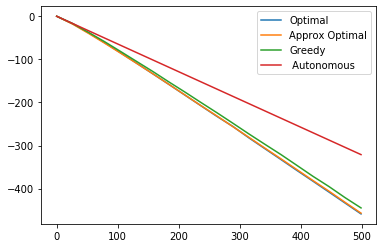

In [62]:
plt.plot(w_grid, v_opt)
plt.plot(w_grid, v_approx)
plt.plot(w_grid, v_greedy)
plt.plot(w_grid, u)
plt.legend(['Optimal', 'Approx Optimal','Greedy', ' Autonomous'])

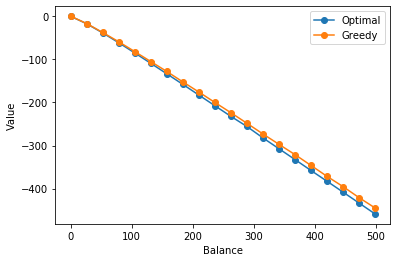

In [98]:
fig, ax = plt.subplots()
ax.plot(w_grid, v_opt, marker='o')
ax.plot(w_grid, v_greedy, marker='o')
ax.set_ylabel('Value')
ax.set_xlabel('Balance')
ax.legend(['Optimal', 'Greedy'])

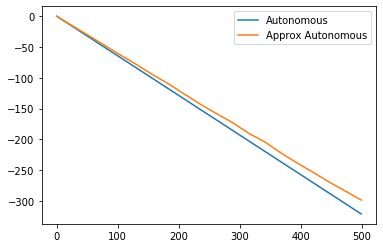

In [64]:
plt.plot(w_grid, u)
plt.plot(w_grid, v_aut)
plt.legend(['Autonomous', 'Approx Autonomous'])

Text(0.5, 0, 'Balance')

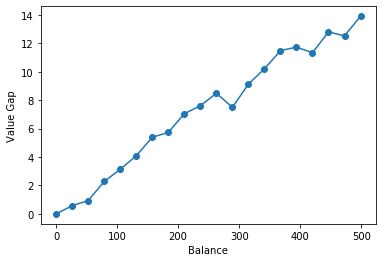

In [85]:
fig, ax = plt.subplots()
ax.plot(w_grid, (v_greedy - v_opt), marker='o')
ax.set_ylabel('Value Gap')
ax.set_xlabel('Balance')

In [73]:
(v_greedy - v_opt)/v_opt

array([-1.        , -0.03326892, -0.02418104, -0.03715916, -0.0368245 ,
       -0.03747195, -0.0403705 , -0.03626748, -0.03853694, -0.03663712,
       -0.03653423, -0.02930957, -0.03232883, -0.0331918 , -0.03452662,
       -0.03277909, -0.02961356, -0.031373  , -0.02889645, -0.03030492])

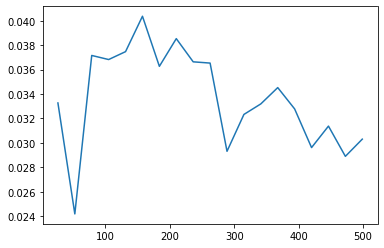

In [88]:
plt.plot(w_grid[1:], (np.abs(v_greedy - v_opt)/np.abs(v_opt))[1:])

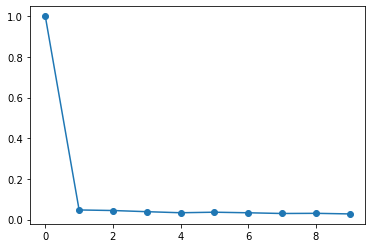

In [41]:
plt.plot((v_opt - v_greedy)/v_opt, marker='o')

In [37]:
chp_optimal.v(lstart, w)

-57.0427815910331


In [39]:
oc.v(1, 75)

array([[-61.12418508]])

In [20]:
a = np.array([0,1,2,3])

In [33]:
chp_aut.calculate_value(10000)

-55.70834040826611

In [40]:
chp_aut.calculate_value(10000)

-55.71607467550114

In [31]:
av.u(1, 75)

-56.218777810238194

In [41]:
 a = [0, 1, 2]

In [10]:
from chp import CHP
chp_optimal = CHP(params, control = optimal_frontier)
chp_greedy = CHP(params, control = greedy_policy)

In [12]:
chp_optimal.v(1, 75)

-64.66900375756671

In [13]:
chp_greedy.v(1, 75)

-61.663711472469004